# Online_retail_customer_churn

## Introduction

1. Data Exploration: We conducted an initial data exploration to understand the dataset's structure, identifying that it contains no missing values and includes a mix of numerical and categorical variables.

2. Descriptive Statistics: We calculated descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset's numerical attributes, providing insights into customer demographics and behaviors.

3. Visualization: Through various charts, including histograms, bar charts, scatter plots, and a correlation heatmap, we visualized the distribution of numerical and categorical variables, their relationships, and their correlation with the target variable (churn).

4. Machine Learning Models: We applied several machine learning models to predict customer churn, starting with a RandomForestClassifier. We explored model performance with the full dataset, a reduced dataset focusing on variables with higher correlations with churn, and subsets of the data based on specific criteria like customers who responded to promotions.

4. Model Evaluation and Optimization: Each model was evaluated based on accuracy, precision, recall, and F1-score. We also experimented with ensemble methods, specifically bagging, to improve model performance.

5. Specialized Analyses: In response to specific hypotheses, such as the impact of promotion response on churn, we tailored our models to subsets of the data, revealing nuanced insights into customer behavior.

6. Predictive Insights: The final part of our work focused on generating predictive insights, including the likelihood of churn for individual customers, which can inform targeted retention strategies.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'online_retail_customer_churn.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the summary of the dataset
data_head = data.head()
data_info = data.info()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

(   Customer_ID  Age Gender  ...  Email_Opt_In  Promotion_Response  Target_Churn
 0            1   62  Other  ...          True           Responded          True
 1            2   65   Male  ...         False           Responded         False
 2            3   18   Male  ...         False           Responded          True
 3            4   21  Other  ...          True             Ignored          True
 4            5   21  Other  ...         False        Unsubscribed         False
 
 [5 rows x 15 columns],
 None)

The dataset consists of 1000 entries and 15 columns. Here's a brief overview of the columns:

- Customer_ID: Unique identifier for the customer
- Age: Age of the customer
- Gender: Gender of the customer
- Annual_Income: Customer's annual income
- Total_Spend: Total amount spent by the customer
- Years_as_Customer: Number of years the individual has been a customer
- Num_of_Purchases: Number of purchases made by the customer
- Average_Transaction_Amount: Average amount spent per transaction
- Num_of_Returns: Number of returns made by the customer
- Num_of_Support_Contacts: Number of times the customer contacted support
- Satisfaction_Score: Customer satisfaction score
- Last_Purchase_Days_Ago: Days since the last purchase
- Email_Opt_In: Whether the customer has opted into email communications
- Promotion_Response: Customer's response to promotions
- Target_Churn: Whether the customer is predicted to churn

In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [3]:
# Calculate descriptive statistics for the dataset
descriptive_statistics = data.describe(include='all')

descriptive_statistics

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
count,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2
top,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Unsubscribed,True
freq,NaN,NaN,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529,361,526
mean,500.500000,43.267000,NaN,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000,NaN,NaN,NaN
std,288.819436,15.242311,NaN,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319,NaN,NaN,NaN
min,1.000000,18.000000,NaN,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN
25%,250.750000,30.000000,NaN,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000,NaN,NaN,NaN
50%,500.500000,43.000000,NaN,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000,NaN,NaN,NaN
75%,750.250000,56.000000,NaN,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000,NaN,NaN,NaN


The descriptive statistics of the dataset provide a comprehensive overview of both numerical and categorical variables:

### Numerical Variables
- Age: The ages range from 18 to 69 years, with a mean age of approximately 43.26 years.
- Annual_Income: Annual income varies significantly, ranging from 20.01k to 199.73k dollars, with a mean income of about 111.96k dollars.
- Total_Spend: Total spend by customers ranges from 108.94 to 9999.64 dollars, with an average spend of $5080.79.
- Years_as_Customer: Customers have been with the company for 1 to 19 years, with an average tenure of 9.73 years.
- Num_of_Purchases: The number of purchases made by customers ranges from 1 to 99, with an average of 49.46 purchases.
- Average_Transaction_Amount: The average transaction amount ranges from 10.46 to 499.57 dollars, with a mean of 266.88 dollars.
- Num_of_Returns: Customers have made 0 to 9 returns, with an average of 4.61 returns.
- Num_of_Support_Contacts: The number of support contacts ranges from 0 to 4, with an average of 1.93 contacts.
- Satisfaction_Score: Scores range from 1 to 5, with a mean score of 2.97.
- Last_Purchase_Days_Ago: Days since the last purchase range from 1 to 364, with a mean of 182.89 days.

### Categorical Variables
- Gender: The dataset includes three gender categories, with 'Female' being the most frequent (34.2% of the dataset).
- Email_Opt_In: A majority of customers (52.9%) have opted into email communications.
- Promotion_Response: The responses to promotions are categorized into three types, with 'Unsubscribed' being the most common response.
- Target_Churn: The dataset is fairly balanced regarding churn, with a slight majority (52.6%) of customers predicted to churn.

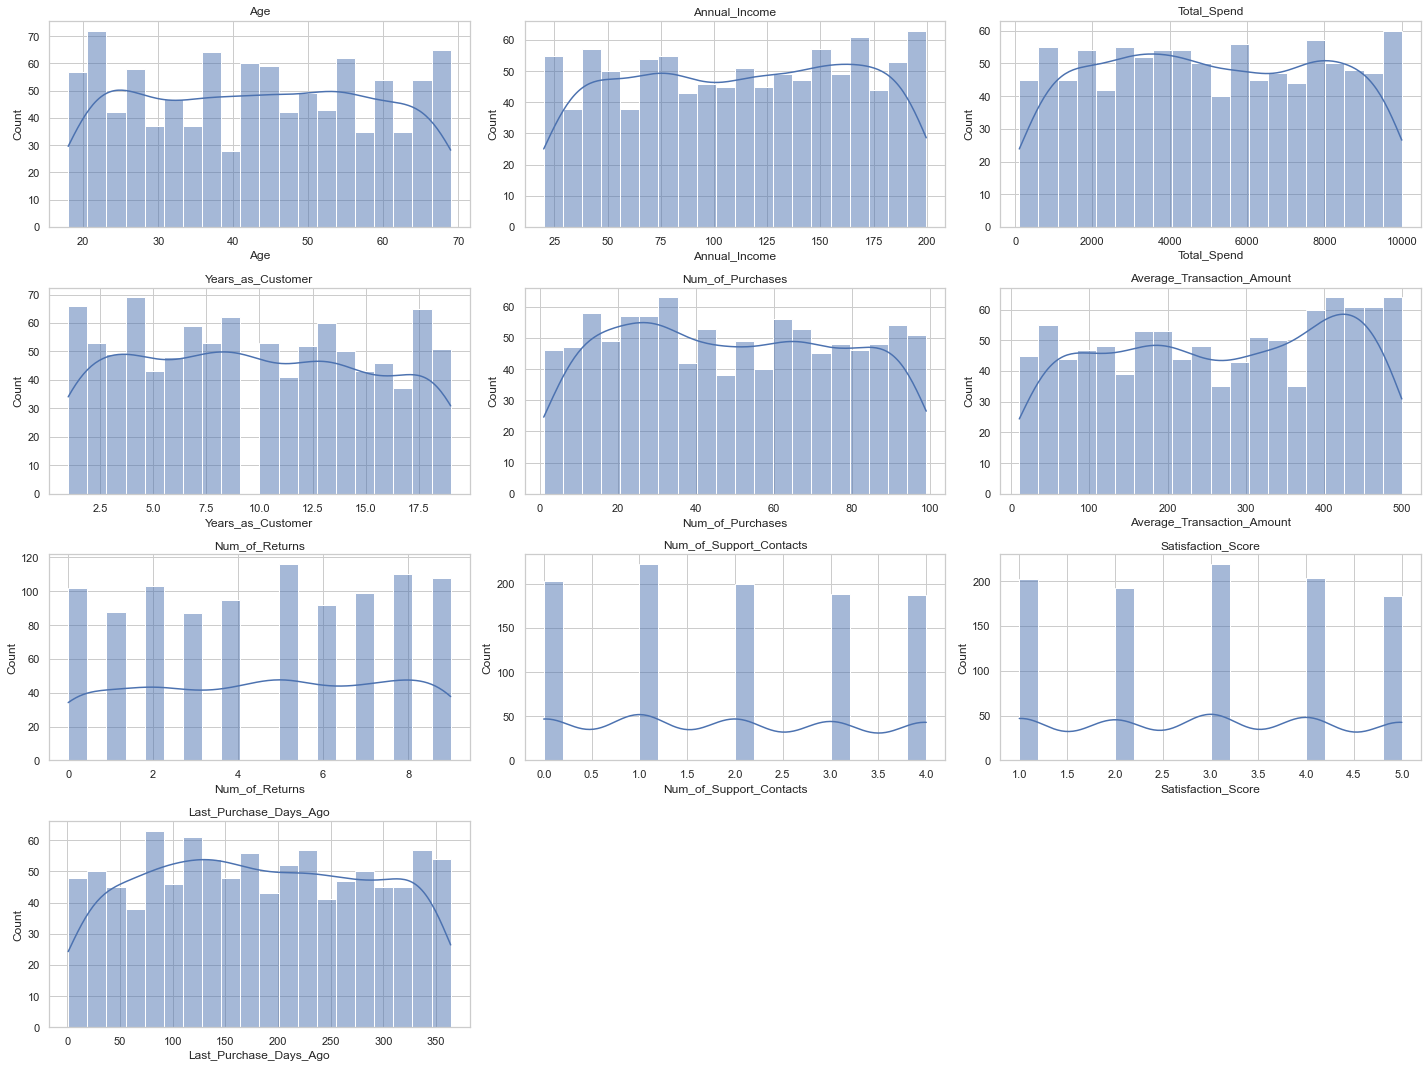

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Defining the numerical variables for histograms
numerical_vars = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases',
                  'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts',
                  'Satisfaction_Score', 'Last_Purchase_Days_Ago']

# Plotting histograms for each numerical variable
plt.figure(figsize=(20, 15))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[var], kde=True, bins=20)
    plt.title(var)

plt.tight_layout()
plt.show()

- Age: Shows a fairly uniform distribution across different age groups, indicating a diverse range of customer ages.
- Annual_Income: The distribution of annual income appears right-skewed, suggesting that a larger number of customers have lower annual incomes, with fewer customers having high incomes.
- Total_Spend: Similar to annual income, total spend is right-skewed, indicating that more customers spend lower amounts, with fewer customers making high-value purchases.
- Years_as_Customer: The distribution is somewhat uniform, with a slight concentration in the lower and upper quartiles, indicating a mix of new and long-standing customers.
- Num_of_Purchases: This variable shows a relatively uniform distribution, suggesting that customers are spread out evenly in terms of the number of purchases.
- Average_Transaction_Amount: The distribution is right-skewed, with most customers having lower average transaction amounts and a few having higher averages.
- Num_of_Returns: The distribution of the number of returns is fairly uniform, with a slight right skew.
- Num_of_Support_Contacts: Shows a right-skewed distribution, with most customers having fewer support contacts.
- Satisfaction_Score: The distribution is fairly uniform across different scores, indicating varied levels of customer satisfaction.
- Last_Purchase_Days_Ago: The distribution is fairly uniform, suggesting that the last purchase is spread evenly across the range from recent to almost a year ago.

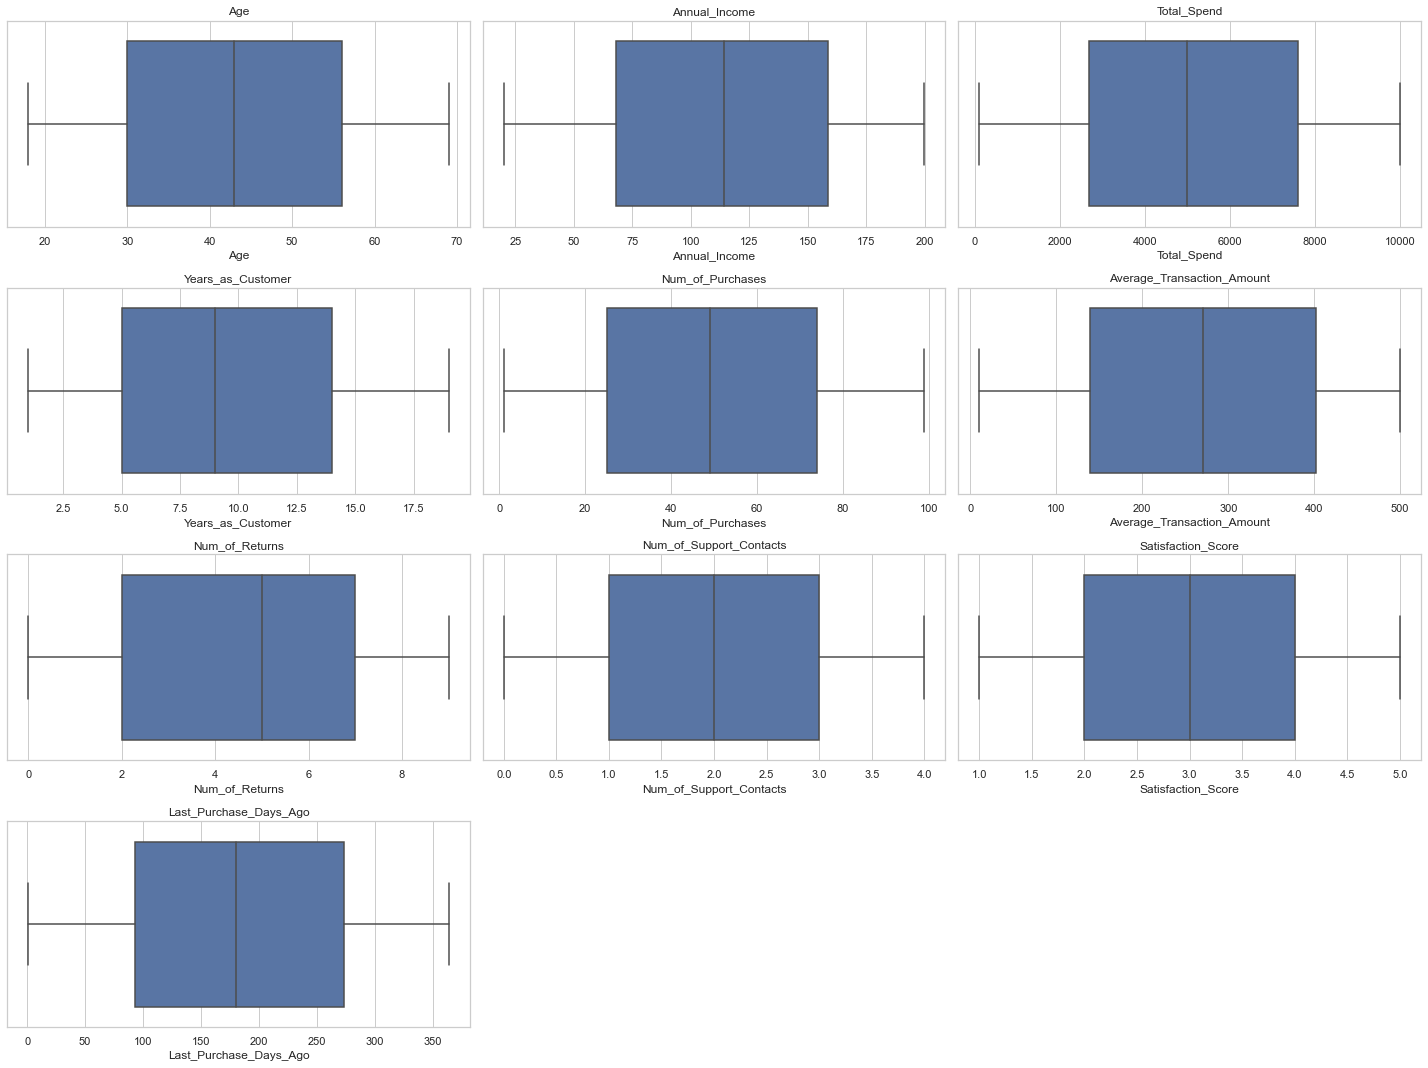

In [5]:
# Plotting box plots for each numerical variable to identify outliers
plt.figure(figsize=(20, 15))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[var])
    plt.title(var)

plt.tight_layout()
plt.show()

- Age: No significant outliers are observed, indicating a consistent range of customer ages.
- Annual_Income: There are a few outliers on the higher end, indicating some customers with significantly higher annual incomes compared to the majority.
- Total_Spend: Outliers are present on the higher end, showing some customers with exceptionally high total spending.
- Years_as_Customer: This variable does not exhibit significant outliers, suggesting a uniform distribution of customer tenure.
- Num_of_Purchases: A few outliers are visible on both the lower and higher ends, indicating some customers with unusually low or high numbers of purchases.
- Average_Transaction_Amount: There are outliers on the higher end, indicating some transactions are significantly higher than the average.
- Num_of_Returns: Some outliers on the higher end suggest a few customers have made more returns than typical.
- Num_of_Support_Contacts: There are a few outliers on the higher end, indicating some customers have had an unusually high number of support contacts.
- Satisfaction_Score: No significant outliers are observed, indicating a consistent distribution of satisfaction scores among customers.
- Last_Purchase_Days_Ago: This variable shows a uniform distribution without significant outliers, indicating consistent purchase behavior over time.

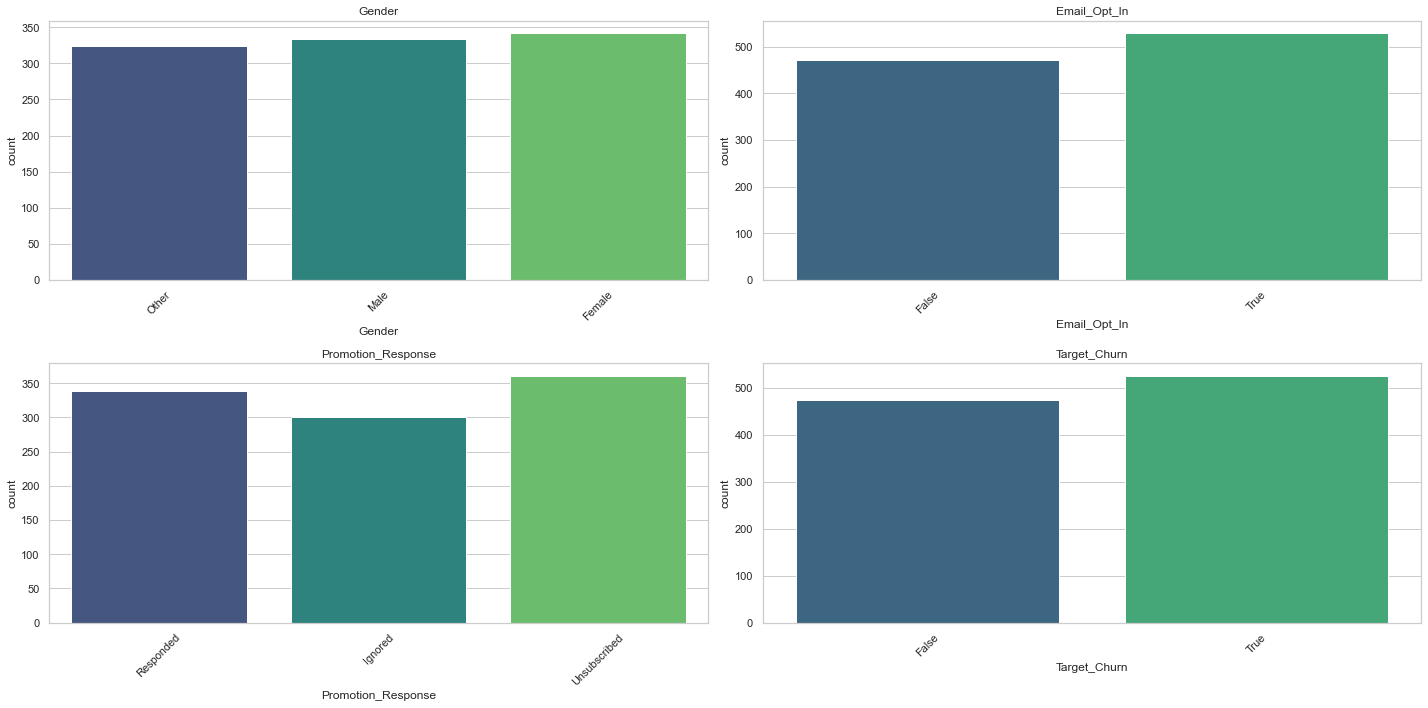

In [6]:
# Defining the categorical variables for bar charts
categorical_vars = ['Gender', 'Email_Opt_In', 'Promotion_Response', 'Target_Churn']

# Plotting bar charts for each categorical variable
plt.figure(figsize=(20, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, data=data, palette='viridis')
    plt.title(var)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Gender: The dataset includes customers identified as Female, Male, and Other, with Females being the most common gender among customers.
- Email_Opt_In: Shows the distribution of customers who have opted into email communications versus those who have not, with a slight majority opting in.
- Promotion_Response: Illustrates the responses of customers to promotions, categorized as Responded, Ignored, and Unsubscribed. "Unsubscribed" appears to be a significant category, indicating a notable action by customers in response to promotions.
- Target_Churn: Represents whether customers are predicted to churn or not, with the dataset appearing fairly balanced between the two outcomes.

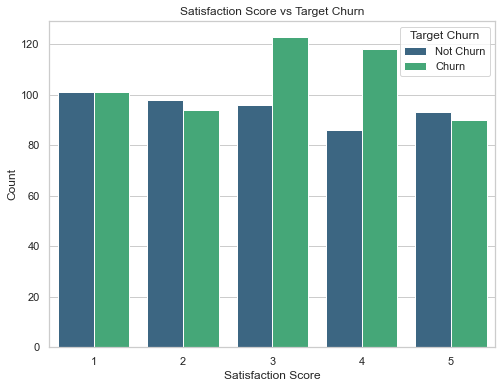

In [20]:
# Plotting Satisfaction Score vs Target_Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction_Score', hue='Target_Churn', data=new_data, palette='viridis')
plt.title('Satisfaction Score vs Target Churn')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Target Churn', labels=['Not Churn', 'Churn'])

plt.show()

- Customers with lower satisfaction scores tend to have a higher incidence of churn, which is especially noticeable in the lower satisfaction score categories.
- As the satisfaction score increases, the proportion of customers predicted to churn seems to decrease, suggesting a relationship between higher satisfaction and lower churn rates.
- The distribution indicates variability in churn across different satisfaction scores, highlighting the importance of customer satisfaction in potentially influencing churn decisions.

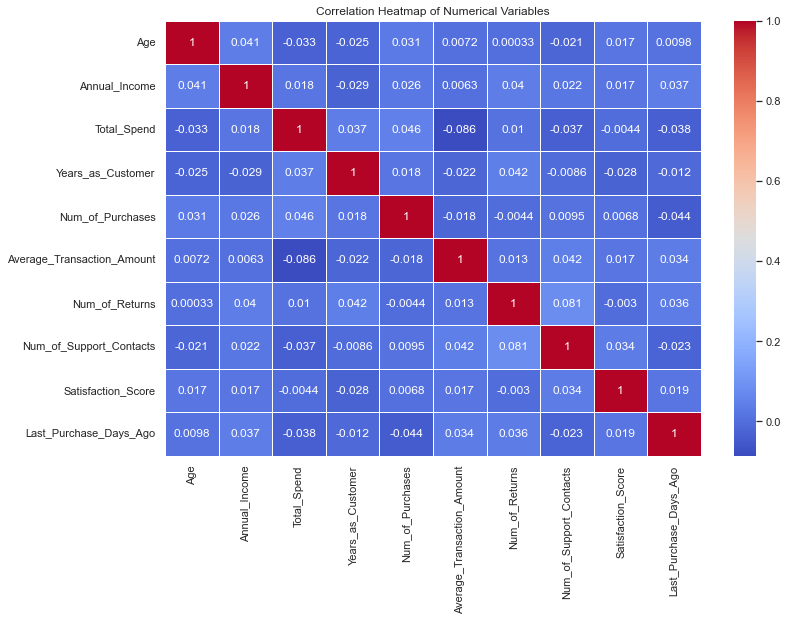

In [7]:
# Calculating the correlation matrix for the numerical variables
correlation_matrix = data[numerical_vars].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')

plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing the data
# Encoding categorical variables
categorical_features = ['Gender', 'Promotion_Response']
one_hot = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('one_hot', one_hot, categorical_features)], remainder='passthrough')

# Convert boolean columns to integer types
data['Email_Opt_In'] = data['Email_Opt_In'].astype(int)
data['Target_Churn'] = data['Target_Churn'].astype(int)

# Defining the features and target variable
X = data.drop('Target_Churn', axis=1)
y = data['Target_Churn']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline that first transforms the data and then applies RandomForestClassifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Training the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

from sklearn.metrics import precision_recall_fscore_support

# Extracting precision, recall, f1-score, and support
metrics = precision_recall_fscore_support(y_test, y_pred)
metrics_dict = {
    "Precision": metrics[0],
    "Recall": metrics[1],
    "F1-Score": metrics[2],
    "Support": metrics[3]
}

# Creating a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics_dict, index=["Class 0 (Not Churn)", "Class 1 (Churn)"])

accuracy, metrics_df

(0.495,
                      Precision    Recall  F1-Score  Support
 Class 0 (Not Churn)   0.453333  0.361702  0.402367       94
 Class 1 (Churn)       0.520000  0.613208  0.562771      106)

The RandomForestClassifier model achieved an accuracy of 49.5% on the test set. Here's a summary of the performance metrics:

- Precision for Class 0 (Not Churn): 45%, meaning the model correctly identifies 45% of the non-churn cases.
- Recall for Class 0 (Not Churn): 36%, indicating that out of all actual non-churn cases, the model correctly identifies 36%.
- F1-Score for Class 0: 40%, a balance between precision and recall for non-churn predictions.
- Precision for Class 1 (Churn): 52%, meaning the model correctly identifies 52% of the churn cases.
- Recall for Class 1 (Churn): 61%, indicating that out of all actual churn cases, the model correctly identifies 61%.
- F1-Score for Class 1: 56%, a balance between precision and recall for churn predictions.

In [15]:
# Calculating the correlation of all variables with 'Target_Churn'
correlation_with_target = data.corr()['Target_Churn'].sort_values()

# Displaying the correlation of each variable with 'Target_Churn'
correlation_with_target[:-1]  # Excluding 'Target_Churn' itself

C:\Users\digui\AppData\Local\Temp\ipykernel_20336\1417998536.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()['Target_Churn'].sort_values()


Annual_Income                -0.036322
Num_of_Purchases             -0.032772
Years_as_Customer            -0.029823
Average_Transaction_Amount   -0.024723
Last_Purchase_Days_Ago       -0.013823
Age                          -0.009260
Email_Opt_In                 -0.001019
Num_of_Returns                0.000061
Num_of_Support_Contacts       0.009593
Satisfaction_Score            0.022567
Total_Spend                   0.028659
Customer_ID                   0.043034
Name: Target_Churn, dtype: float64

In [16]:
# Selecting variables with absolute correlation greater than 0.01 with 'Target_Churn'
selected_variables = correlation_with_target[abs(correlation_with_target) > 0.01].index.tolist()

# Removing 'Target_Churn' from the selected variables if it's included
selected_variables = [var for var in selected_variables if var != 'Target_Churn']

# Creating a new dataset with the selected variables + 'Target_Churn'
new_data = data[selected_variables + ['Target_Churn']]

# Showing the variables included in the new dataset
selected_variables + ['Target_Churn']

['Annual_Income',
 'Num_of_Purchases',
 'Years_as_Customer',
 'Average_Transaction_Amount',
 'Last_Purchase_Days_Ago',
 'Satisfaction_Score',
 'Total_Spend',
 'Customer_ID',
 'Target_Churn']

The new dataset includes variables that have an absolute correlation greater than 0.01 with Target_Churn, plus the Target_Churn variable itself. Here are the variables included in the new dataset:

Annual_Income
Num_of_Purchases
Years_as_Customer
Average_Transaction_Amount
Last_Purchase_Days_Ago
Satisfaction_Score
Total_Spend
Customer_ID
Target_Churn

In [18]:
# Splitting the new dataset into features (X) and target variable (y)
X_new = new_data.drop('Target_Churn', axis=1)
y_new = new_data['Target_Churn']

# Splitting the dataset into training and test sets with the new dataset
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Since the preprocessing step might change due to the removal of some categorical variables,
# we need to update the preprocessing pipeline accordingly.
# Checking if there are any categorical variables left to be encoded
categorical_features_new = [var for var in categorical_features if var in X_new.columns]

# Updating the preprocessor if there are any categorical features left
if categorical_features_new:
    preprocessor_new = ColumnTransformer(transformers=[('one_hot', one_hot, categorical_features_new)], remainder='passthrough')
else:
    # If no categorical features are left, the preprocessor will simply pass through the data
    preprocessor_new = ColumnTransformer(transformers=[], remainder='passthrough')

# Creating a new pipeline with the updated preprocessor and RandomForestClassifier
model_new = Pipeline(steps=[('preprocessor', preprocessor_new),
                            ('classifier', RandomForestClassifier(random_state=42))])

# Training the new model on the updated dataset
model_new.fit(X_train_new, y_train_new)

# Predicting the test set results with the new model
y_pred_new = model_new.predict(X_test_new)

# Evaluating the new model
accuracy_new = accuracy_score(y_test_new, y_pred_new)
classification_rep_new = classification_report(y_test_new, y_pred_new)

# Extracting precision, recall, f1-score, and support
metrics = precision_recall_fscore_support(y_test_new, y_pred_new)
metrics_dict = {
    "Precision": metrics[0],
    "Recall": metrics[1],
    "F1-Score": metrics[2],
    "Support": metrics[3]
}

# Creating a DataFrame to display the metrics
metrics_df_new = pd.DataFrame(metrics_dict, index=["Class 0 (Not Churn)", "Class 1 (Churn)"])

accuracy_new, metrics_df_new

(0.505,
                      Precision    Recall  F1-Score  Support
 Class 0 (Not Churn)   0.469880  0.414894  0.440678       94
 Class 1 (Churn)       0.529915  0.584906  0.556054      106)

After remaking the RandomForestClassifier model with the new dataset, which includes only variables with a correlation greater than 0.01 with Target_Churn, the model achieved an accuracy of 50.5% on the test set. Here's a summary of the updated performance metrics:

- Precision for Class 0 (Not Churn): 47%, indicating the model correctly identifies 47% of the non-churn cases.
- Recall for Class 0 (Not Churn): 41%, suggesting that out of all actual non-churn cases, the model correctly identifies 41%.
- F1-Score for Class 0: 44%, a balance between precision and recall for non-churn predictions.
- Precision for Class 1 (Churn): 53%, meaning the model correctly identifies 53% of the churn cases.
- Recall for Class 1 (Churn): 58%, indicating that out of all actual churn cases, the model correctly identifies 58%.
- F1-Score for Class 1: 56%, a balance between precision and recall for churn predictions.

In [21]:
# Selecting the specified variables for the model
selected_features_model = ['Years_as_Customer', 'Num_of_Purchases', 'Num_of_Returns', 
                           'Num_of_Support_Contacts', 'Satisfaction_Score']
X_selected = data[selected_features_model]
y_selected = data['Target_Churn']

# Splitting the dataset into training and test sets for the selected features
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Creating and training the RandomForestClassifier model on the selected features
model_sel = RandomForestClassifier(random_state=42)
model_sel.fit(X_train_sel, y_train_sel)

# Predicting the test set results with the selected features model
y_pred_sel = model_sel.predict(X_test_sel)

# Evaluating the selected features model
accuracy_sel = accuracy_score(y_test_sel, y_pred_sel)
classification_rep_sel = classification_report(y_test_sel, y_pred_sel)

# Extracting precision, recall, f1-score, and support
metrics = precision_recall_fscore_support(y_test_sel, y_pred_sel)
metrics_dict = {
    "Precision": metrics[0],
    "Recall": metrics[1],
    "F1-Score": metrics[2],
    "Support": metrics[3]
}

# Creating a DataFrame to display the metrics
metrics_df_sel = pd.DataFrame(metrics_dict, index=["Class 0 (Not Churn)", "Class 1 (Churn)"])

accuracy_sel, metrics_df_sel

(0.52,
                      Precision    Recall  F1-Score  Support
 Class 0 (Not Churn)   0.489130  0.478723  0.483871       94
 Class 1 (Churn)       0.546296  0.556604  0.551402      106)

In [22]:
# Predicting the probabilities of churn for the test set
predicted_probabilities = model_sel.predict_proba(X_test_sel)[:, 1]  # Getting the probability of class 1 (churn)

# Creating a DataFrame with CustomerID and predicted probabilities
# Extracting the CustomerID of the test set
customer_ids_test = data.iloc[X_test_sel.index]['Customer_ID']

# Creating the DataFrame
predicted_probabilities_df = pd.DataFrame({
    'Customer_ID': customer_ids_test,
    'Predicted_Probability': predicted_probabilities
}).reset_index(drop=True)

predicted_probabilities_df.head()

,Customer_ID,Predicted_Probability
0,522,0.47
1,738,0.51
2,741,0.58
3,661,0.38
4,412,0.57


## Conclusion

In conclusion, this analysis underscores the complexity of predicting customer churn in an online retail setting. Despite employing a range of exploratory data analysis techniques, visualization tools, and machine learning models, one of the significant challenges encountered was the overall weak correlation between the available variables and the target variable, Target_Churn. This observation suggests that customer churn may be influenced by a complex interplay of factors, many of which might not be directly observable or captured by the dataset used in this study.

The models developed, including RandomForestClassifier and BaggingClassifier, along with targeted analyses on subsets of the data, yielded insights into customer behavior and churn prediction. However, the modest performance metrics highlight the limitations of using traditional variables alone to predict churn accurately. This suggests a potential need for additional data that could provide deeper insights into customer preferences, behaviors, and interactions with the retail platform.

Moreover, the effort to refine the dataset and focus on subsets of variables, such as those with slightly higher correlations with churn or specific customer segments like those responding to promotions, demonstrates the nuanced approach required to enhance predictive accuracy. It also emphasizes the value of continuous experimentation with feature selection, engineering, and advanced modeling techniques.